In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats


In [299]:
WH = pd.read_csv('white_house_2017_salaries(RAW).csv',delimiter =',')

In [300]:
WH['SALARY'] = WH['SALARY'].str.replace('$','')
WH['SALARY'] = WH['SALARY'].str.replace(' ','')
WH['SALARY'] = WH['SALARY'].str.replace(',','')

In [301]:
WH['SALARY'].describe()

count           377
unique           74
top       115000.00
freq             46
Name: SALARY, dtype: object

In [302]:
WH['SALARY'] = pd.to_numeric(WH['SALARY'],errors = 'coerce')

In [303]:
WH.describe()

,SALARY
count,377.000000
mean,94872.000000
std,43112.357821
min,0.000000
25%,56000.000000
50%,89000.000000
75%,119000.000000
max,187100.000000


In [304]:
WH['AVG_Salary_Job_title'] = WH.groupby('POSITION TITLE')['SALARY'].transform(np.mean)

In [305]:
WH_average = WH[['POSITION TITLE', 'AVG_Salary_Job_title']]
WH_average = WH_average.drop_duplicates()
WH_average = WH_average.sort_values(by='AVG_Salary_Job_title', ascending=False).reset_index(drop=True)
print 'TOP 5 Highest Salary Poisition: ',      WH_average['POSITION TITLE'][:5].tolist()

TOP 5 Highest Salary Poisition:  ['SENIOR POLICY ADVISOR', 'ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL SECURITY ADVISOR', 'ASSISTANT TO THE PRESIDENT AND DIRECTOR OF STRATEGIC COMMUNICATIONS', 'ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SOCIAL MEDIA', 'ASSISTANT TO THE PRESIDENT AND WHITE HOUSE STAFF SECRETARY']


In [306]:
print WH.groupby('NAME')['SALARY'].mean().sort_values(ascending = False)[:5]

NAME
House, Mark S.           187100.0
Powell, Dina H.          179700.0
Miller, Stephen          179700.0
Dearborn, Ricky A.       179700.0
McGahn, II, Donald F.    179700.0
Name: SALARY, dtype: float64


In [307]:
def mean_confidence_interval(data,confidence = 0.95):
    x = 1.0*np.array(data)
    length = len(x)
    mean,sd = np.mean(x), scipy.stats.sem(x)
    interval = sd * sp.stats.t._ppf((1+confidence)/2.0,length-1)
    return mean - interval, mean, mean+interval

mean = WH['SALARY'].mean()
print '95% Interval Around the Mean:     ', mean_confidence_interval(WH['SALARY'])
    

95% Interval Around the Mean:      (90506.043706544224, 94872.0, 99237.956293455776)


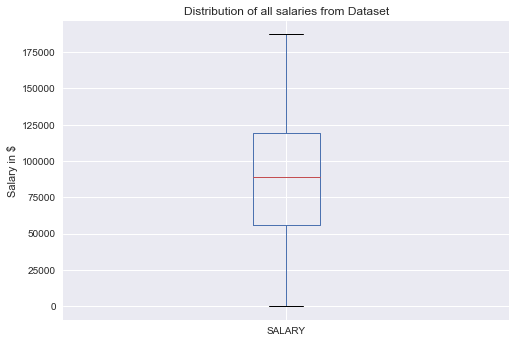

In [308]:
WH.boxplot('SALARY')
plt.title('Distribution of all salaries from Dataset')
plt.ylabel('Salary in $')
plt.show()